# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Imports

In [12]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1)

import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import cufflinks as cf
cf.go_offline()

## Get the Data
use pandas to directly read data from Google finance using 

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** [DataReader documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) **

In [8]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

BAC = data.DataReader("BAC", 'google', start=start, end=end) # Bank of America
C = data.DataReader("C", 'google', start=start, end=end) # CitiGroup
GS = data.DataReader("GS", 'google', start=start, end=end) # Goldman Sachs
JPM = data.DataReader("JPM", 'google', start=start, end=end) # JPMorgan Chase
MS = data.DataReader("MS", 'google', start=start, end=end) # Morgan Stanley
WFC = data.DataReader("WFC", 'google', start=start, end=end) # Wells Fargo
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

In [9]:
df

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 2547 (major_axis) x 6 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2006-01-03 00:00:00 to 2015-12-31 00:00:00
Minor_axis axis: BAC to WFC

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [11]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1) #[BAC, C, GS, JPM, MS, WFC]

** Set the column name levels**

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [15]:
bank_stocks.head()

Bank Ticker  BAC                            C                                  \
Stock Info  Open High Low Close Volume   Open   High    Low  Close     Volume   
Date                                                                            
2006-01-03   NaN  NaN NaN   NaN    NaN  490.0  493.8  481.1  492.9  1537660.0   
2006-01-04   NaN  NaN NaN   NaN    NaN  488.6  491.0  483.5  483.8  1871020.0   
2006-01-05   NaN  NaN NaN   NaN    NaN  484.4  487.8  484.0  486.2  1143160.0   
2006-01-06   NaN  NaN NaN   NaN    NaN  488.8  489.0  482.0  486.2  1370250.0   
2006-01-09   NaN  NaN NaN   NaN    NaN  486.0  487.4  483.0  483.9  1680740.0   

Bank Ticker     ...         MS                                    WFC         \
Stock Info      ...       Open   High    Low  Close     Volume   Open   High   
Date            ...                                                            
2006-01-03      ...      57.17  58.49  56.74  58.31  5377000.0  31.60  31.98   
2006-01-04      ...      58.70  59.28  58.35  58.35  7977800.0  31.80  31.82   
2006-01-05      ...      58.55  58.59  58.02  58.51  5778000.0  31.50  31.56   
2006-01-06      ...      58.77  58.85  58.05  58.57  6889800.0  31.58  31.78   
2006-01-09      ...      58.63  59.29  58.62  59.19  4144500.0  31.68  31.82   

Bank Ticker                            
Stock Info     Low  Close      Volume  
Date                                   
2006-01-03   31.20  31.90  11016400.0  
2006-01-04   31.36  31.53  10871000.0  
2006-01-05   31.31  31.50  10158000.0  
2006-01-06   31.38  31.68   8403800.0  
2006-01-09   31.56  31.68   5619600.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!  

[Multi-Level Indexing documentation](http://pandas.pydata.org/pandas-docs/stable/advanced.html) 

[DataFrame.xs documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [16]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     10.65
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()


** We can use pandas pct_change() method on the Close column to create a column representing this return value, then create a for-loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

# returns.dropna(inplace=True)
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,NaN,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,NaN,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,NaN,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn**

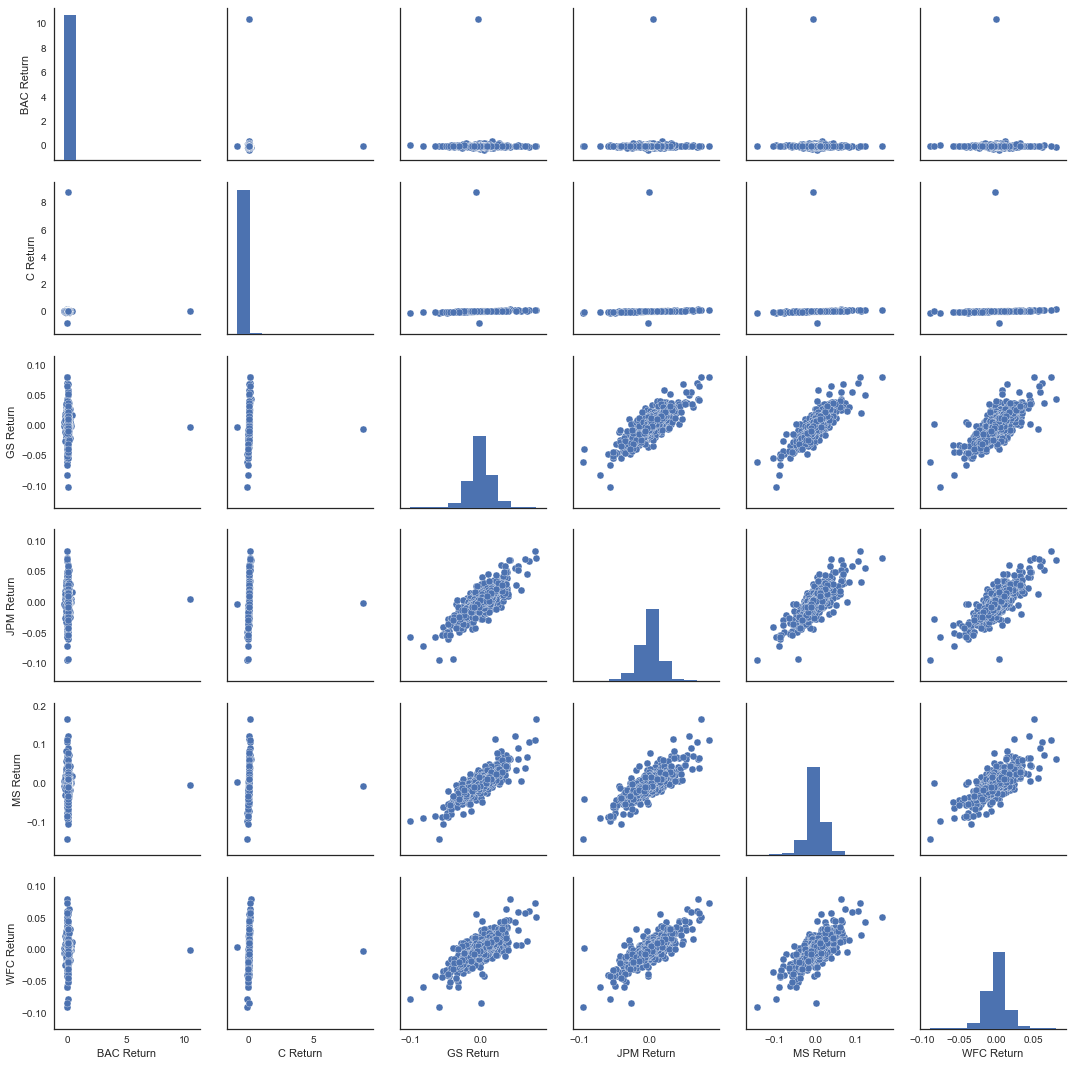

In [19]:
sns.pairplot(returns.dropna())

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#Collapse_.26_US_Government_Intervention_.282008.29)

** On what dates each bank stock had the best and worst single day returns. **

In [43]:
returns.idxmin()

BAC Return   2015-04-23
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

 4 of the banks share the same day for the worst drop, did anything significant happen that day? **

** [Google: 2009-01-20](https://www.google.pl/search?q=2009-01-20&oq=2009-01-20&aqs=chrome..69i57&sourceid=chrome&ie=UTF-8) **
** Barack Obama inauguration **

In [27]:
returns.idxmax()

BAC Return   2015-02-25
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Q:** Citigroup's largest drop and biggest gain were very close to one another, why? **

A:** [WSJ article on Citigroup Reverse Stock Split](https://www.wsj.com/articles/SB10001424052748704681904576313581047141782) **

** Let's take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which can be classified as the riskiest for the year 2015?**

In [44]:
returns.std()

BAC Return    0.306005
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [45]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.676491
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

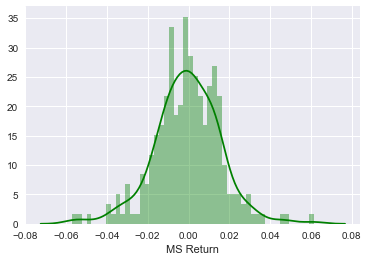

In [50]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'].dropna(), color='green', bins=50)
# returns.loc['2015-01-01':'2015-12-31']['MS Return'].dropna()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

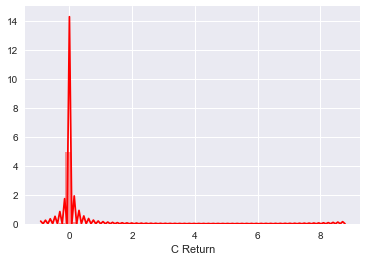

In [51]:
sns.distplot(returns.loc['2008-01-01':'2015-12-31']['C Return'].dropna(), color='red')

** Let's create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

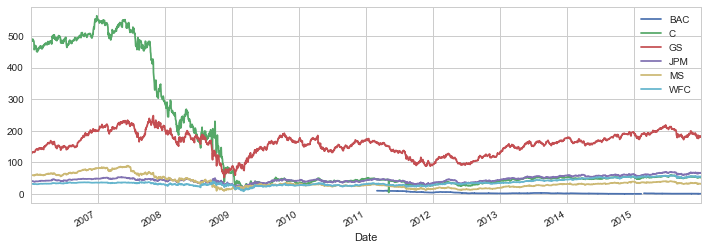

In [53]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

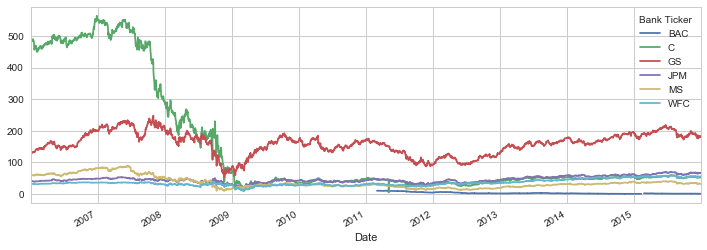

In [54]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [68]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Let's plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

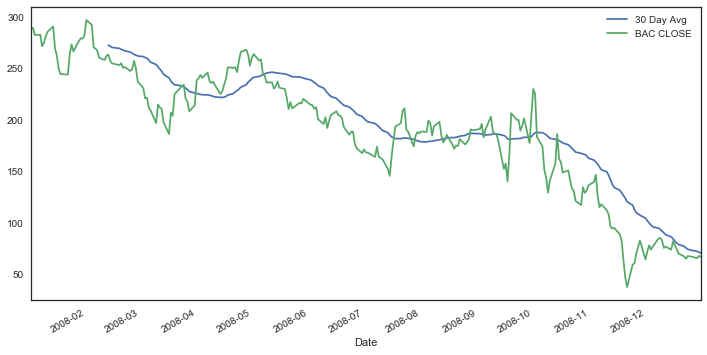

In [69]:
plt.figure(figsize=(12,6))
C['Close'].loc['2008-01-01':'2009-01-01'].dropna().rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2008-01-01':'2009-01-01'].dropna().plot(label='BAC CLOSE')
plt.legend()

** Let's create a heatmap of the correlation between the stocks Close Price.**

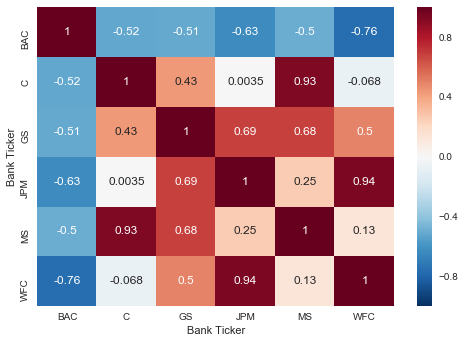

In [70]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
# bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

** Let's use seaborn's clustermap to cluster the correlations together:**

C:\Users\mlieb\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



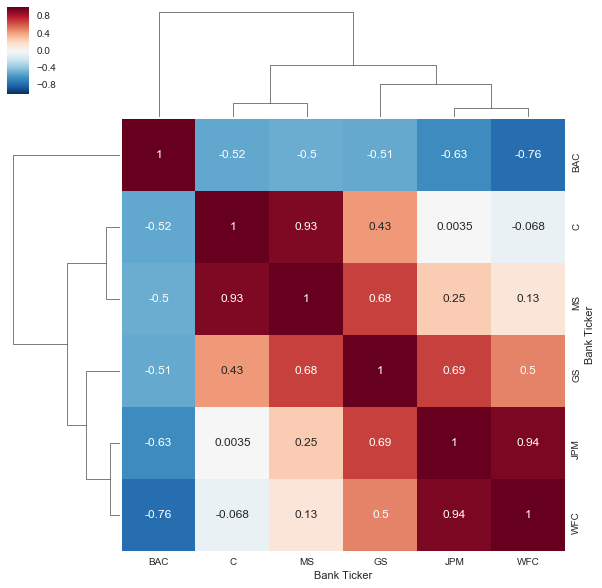

In [71]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [72]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

Let's create some Technical Analysis plots. 

In [26]:
trace = go.Candlestick(x=BAC.index,
                       open=BAC.Open,
                       high=BAC.High,
                       low=BAC.Low,
                       close=BAC.Close)

data = [trace]
py.iplot(data, filename='simple_candlestick')

** Let's use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [76]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [77]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')